In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
dataset = pd.read_csv("Outlier_Loan_dataset.csv")
dataset.head()

,User_ID,Loan_ID,City,Age,Job,Education,Marriage_Status,Account_Balance,Loan_Amount,Credit_Score,Debit_Transactions,Loan_Duration_Months,Application_Date,Current_Balance
0,U2169,L532233,Quetta,39.0,Clerk,Matric,Married,269967.77,29744.65,554.61,8955.54,45,2024-11-26,139275.96
1,U2807,L516508,Karachi,33.0,Driver,Matric,Married,246231.68,365315.52,606.98,14781.58,6,2024-08-18,61391.92
2,U4536,L471613,Peshawar,41.0,Manager,Bachelor,Divorced,202981.52,26227.40,629.32,15126.12,59,2024-01-27,115353.44
3,U9628,L354161,Lahore,50.0,Doctor,Matric,Married,167653.16,40761.15,744.38,18308.41,9,2022-09-19,136059.95
4,U8765,L650075,Karachi,32.0,Teacher,PhD,Married,234911.17,-6808.44,677.83,5431.99,35,2022-08-23,50588.27


In [4]:
# Checking the total number of missing (null) values in each column of the dataset.
dataset.isnull().sum()

User_ID                  0
Loan_ID                  0
City                     0
Age                     20
Job                      0
Education               20
Marriage_Status          0
Account_Balance          0
Loan_Amount             20
Credit_Score             0
Debit_Transactions       0
Loan_Duration_Months     0
Application_Date         0
Current_Balance          0
dtype: int64

In [5]:
# checking the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               1000 non-null   object 
 1   Loan_ID               1000 non-null   object 
 2   City                  1000 non-null   object 
 3   Age                   980 non-null    float64
 4   Job                   1000 non-null   object 
 5   Education             980 non-null    object 
 6   Marriage_Status       1000 non-null   object 
 7   Account_Balance       1000 non-null   float64
 8   Loan_Amount           980 non-null    float64
 9   Credit_Score          1000 non-null   float64
 10  Debit_Transactions    1000 non-null   float64
 11  Loan_Duration_Months  1000 non-null   int64  
 12  Application_Date      1000 non-null   object 
 13  Current_Balance       1000 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 109.5+ KB


In [6]:
# Filling missing values in the 'Age' column with median.
dataset['Age' ] = dataset['Age' ].fillna(dataset['Age' ].median())

In [7]:
# Counting the repeating values
dataset['Education'].value_counts()

Education
Matric          215
Bachelor        202
Intermediate    200
Master          183
PhD             180
Name: count, dtype: int64

In [8]:
# Filling missing values in the 'Educaion' column with the Mode().
dataset['Education'] = dataset['Education'].fillna(dataset['Education'].mode()[0])

In [9]:
# Filling missing values in the 'Loan_Amount' column with median.
dataset['Loan_Amount'] = dataset['Loan_Amount'].fillna(dataset['Loan_Amount'].median())

In [10]:
dataset.isnull().sum()

User_ID                 0
Loan_ID                 0
City                    0
Age                     0
Job                     0
Education               0
Marriage_Status         0
Account_Balance         0
Loan_Amount             0
Credit_Score            0
Debit_Transactions      0
Loan_Duration_Months    0
Application_Date        0
Current_Balance         0
dtype: int64

In [11]:
# Useful for understanding data distribution and statistical terms
dataset.describe()

,Age,Account_Balance,Loan_Amount,Credit_Score,Debit_Transactions,Loan_Duration_Months,Current_Balance
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.688000,2.445752e+05,65486.272990,658.063990,14655.084470,31.564000,100987.321210
std,9.674723,2.145093e+05,86414.521671,75.058019,6946.661359,15.342793,39492.372032
min,2.000000,5.298057e+04,-214960.080000,503.530000,-7236.930000,6.000000,-22578.270000
25%,28.000000,1.711243e+05,31714.957500,613.347500,10221.767500,18.000000,74024.610000
50%,35.000000,2.057074e+05,51769.330000,651.710000,14872.305000,31.000000,100390.475000
75%,41.000000,2.426467e+05,72391.965000,686.887500,19473.860000,44.000000,127794.932500
max,73.000000,1.769965e+06,868997.760000,1053.400000,36790.370000,59.000000,243978.670000


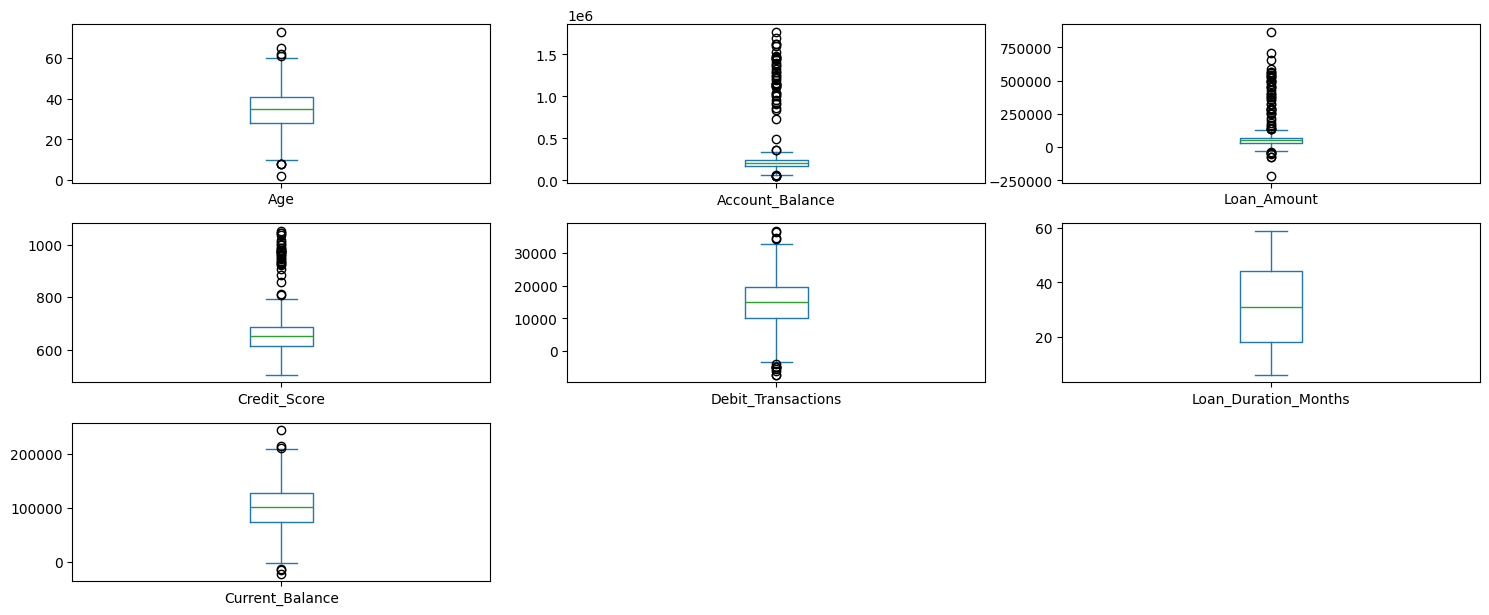

In [12]:
# Checking for outliers in the dataset using box plots.
dataset.plot(kind = "box",
             subplots = True,
             layout = ((len(dataset.columns)//3) + 1, 3),
             figsize = (15,10))
plt.tight_layout()
plt.show()

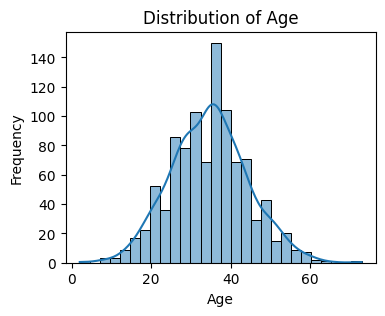

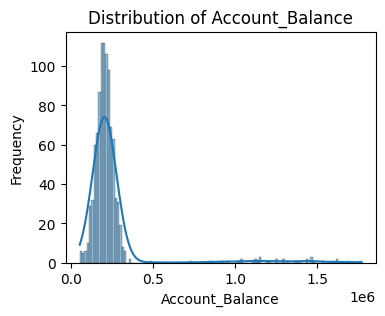

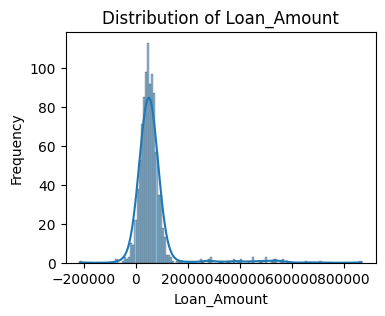

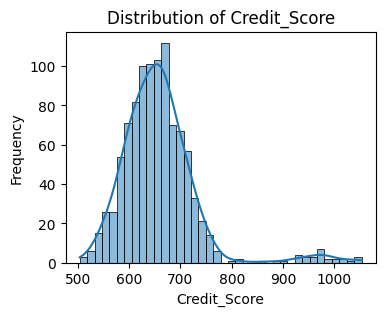

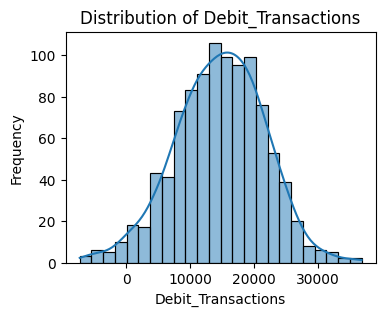

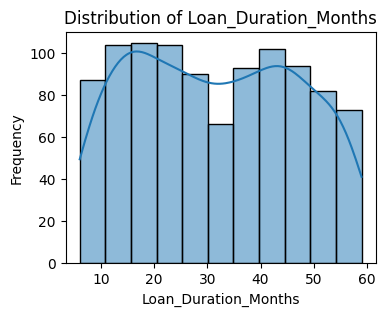

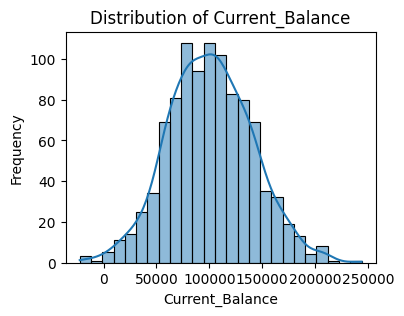

In [13]:
# This helps understand the shape of the data and detect possible outliers
numeric_cols = dataset.select_dtypes(["float64","int64"]).columns

for i in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.histplot(dataset[i], kde=True)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()



In [14]:
# Calculating the skewness of each numeric column.
numeric_cols = dataset.select_dtypes(["float64","int64"]).columns
print(dataset[numeric_cols].skew())

Age                     0.125910
Account_Balance         4.748708
Loan_Amount             4.519042
Credit_Score            2.117164
Debit_Transactions     -0.175801
Loan_Duration_Months    0.064750
Current_Balance         0.110062
dtype: float64


In [15]:
# Creating a copy of the original dataset
clean_dataset = dataset.copy()

In [16]:
#skewness dataset columns are store in skew_col
skew_col = clean_dataset[['Account_Balance','Loan_Amount','Credit_Score']]

In [17]:
# Removing outliers from selected skewed columns using the IQR method.
for i in skew_col:
    Q1 = dataset[i].quantile(0.25)
    Q3 = dataset[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower = Q1 - 1.5 * IQR
    Upper = Q3 + 1.5 * IQR
    clean_dataset = clean_dataset[(dataset[i] >= Lower) & (dataset[i] <= Upper)]

C:\Users\Aamir Shahzad\AppData\Local\Temp\ipykernel_13464\2802855167.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_dataset = clean_dataset[(dataset[i] >= Lower) & (dataset[i] <= Upper)]
C:\Users\Aamir Shahzad\AppData\Local\Temp\ipykernel_13464\2802855167.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_dataset = clean_dataset[(dataset[i] >= Lower) & (dataset[i] <= Upper)]


In [18]:
clean_dataset.shape

(870, 14)

In [19]:
import numpy as np
from scipy import stats

In [20]:
# Selecting columns that are expected to follow a normal distribution.
normal_col = clean_dataset[['Age','Debit_Transactions','Loan_Duration_Months','Current_Balance']]
z_score = np.abs(stats.zscore(normal_col))
final_clean_data = clean_dataset[(z_score < 3).all(axis=1)]

In [21]:
final_clean_data.shape

(860, 14)

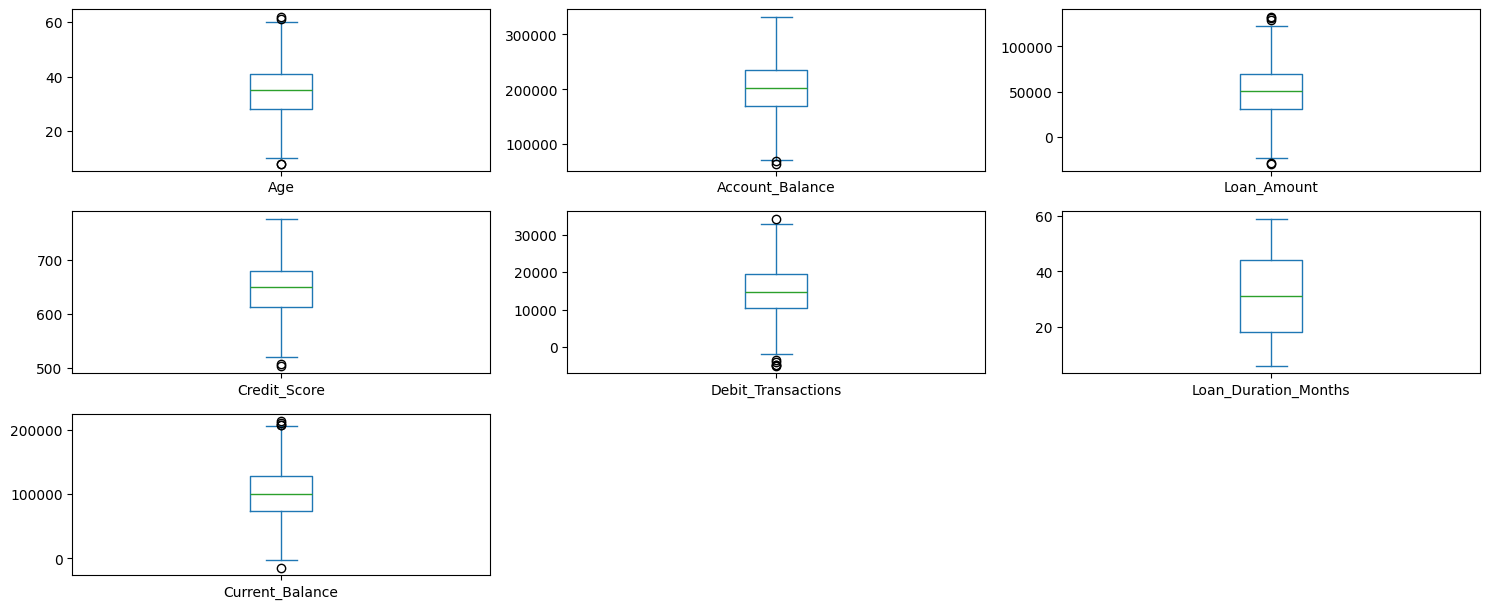

In [22]:
# Creating box plots for the cleaned dataset after outlier removal.
final_clean_data.plot(
    kind = "box",
    subplots = True,
    layout = ((len(clean_dataset.columns)//3)+1,3),
    figsize = (15,10)
)
plt.tight_layout()
plt.show()

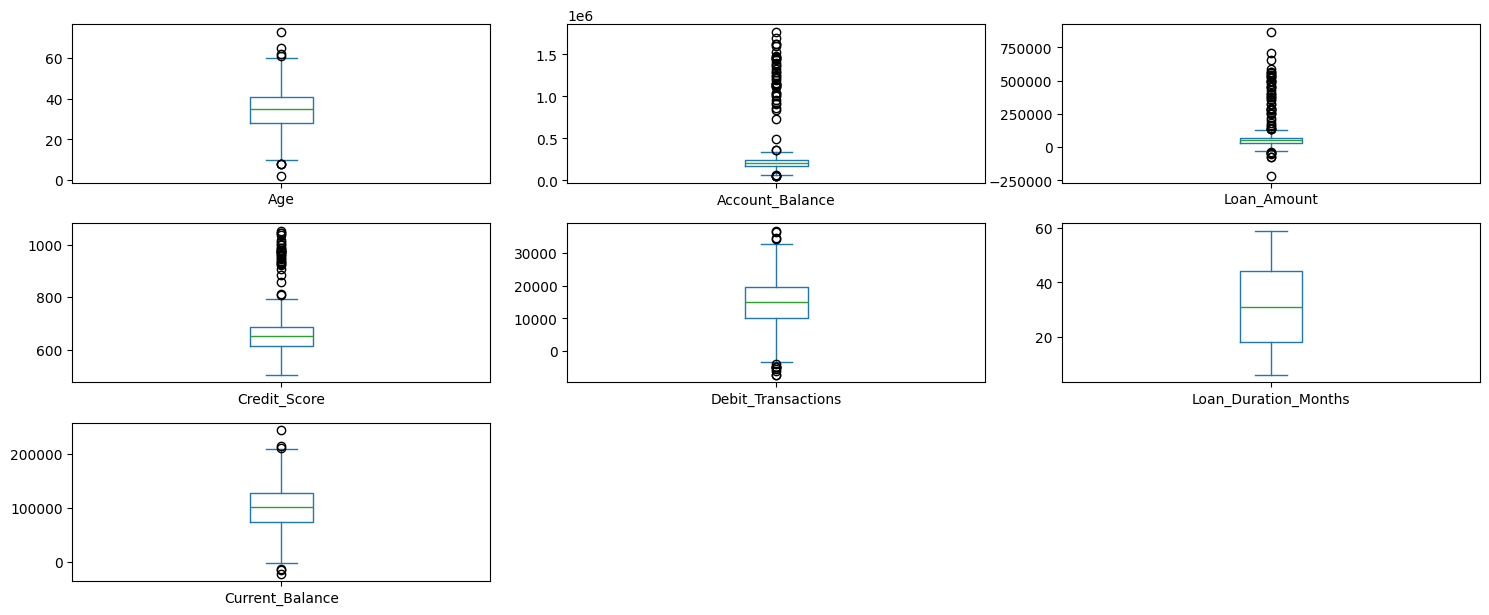

In [23]:
# Display the box plots of the original dataset for visual comparison with final_cleaned_data.
dataset.plot(
    kind = "box",
    subplots = True,
    layout = ((len(clean_dataset.columns)//3)+1,3),
    figsize = (15,10)
)
plt.tight_layout()
plt.show()

In [24]:
dataset.shape

(1000, 14)

In [25]:
final_clean_data.shape

(860, 14)

In [26]:
# Final cleaning was performed using the IQR method for skewed features and the Z-score method for normally distributed features.  
# These techniques effectively removed outliers, ensuring a clean and reliable dataset for analysis.
